In [67]:
import pandas as pd
data = pd.read_csv('final_ml_data_set.csv', low_memory=False)
data.head()

,Age,Height (ft-in),Weight (lb),Shoulder Pain,R/L/B/P,Bra Color,Bra Size,Embroidery,Jacquard Fabric,Bra Style,...,Brand,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure
0,77,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,Amoena,N,N,N,N,N,Y,N,N,F/B
1,78,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,Amoena,N,N,N,N,N,Y,N,N,F/B
2,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,Amoena,N,N,N,Y,Y,N,N,N,B
3,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,Amoena,N,N,N,Y,Y,N,N,N,B
4,78,"4'10""",100,Y,L,black,32A,N,N,Lara,...,Amoena,N,N,N,Y,Y,N,N,N,B


In [68]:
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("\'")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace('"',''))
    return (12*ft_) + in_

In [69]:
data["Ht (inches)"] = data["Height (ft-in)"].apply(lambda x:parse_ht(x))

In [70]:
data.head()

,Age,Height (ft-in),Weight (lb),Shoulder Pain,R/L/B/P,Bra Color,Bra Size,Embroidery,Jacquard Fabric,Bra Style,...,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Ht (inches)
0,77,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,N,N,N,N,N,Y,N,N,F/B,60.0
1,78,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,N,N,N,N,N,Y,N,N,F/B,60.0
2,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,N,N,N,Y,Y,N,N,N,B,58.0
3,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,N,N,N,Y,Y,N,N,N,B,58.0
4,78,"4'10""",100,Y,L,black,32A,N,N,Lara,...,N,N,N,Y,Y,N,N,N,B,58.0


In [34]:
def band_size(size):
    band = int(size[0:2])
    return band

def cup_size(size):
    cup = size[2:]
    return cup

In [71]:
data["Band Size"] = data["Bra Size"].apply(lambda x:band_size(x))
data["Cup Size"] = data["Bra Size"].apply(lambda x:cup_size(x))

In [72]:
data.head()

,Age,Height (ft-in),Weight (lb),Shoulder Pain,R/L/B/P,Bra Color,Bra Size,Embroidery,Jacquard Fabric,Bra Style,...,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Ht (inches),Band Size,Cup Size
0,77,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,N,N,N,Y,N,N,F/B,60.0,32,A
1,78,"5'0""",100,N,R,nude,32A,N,Y,Ellen,...,N,N,N,Y,N,N,F/B,60.0,32,A
2,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,N,Y,Y,N,N,N,B,58.0,32,A
3,78,"4'10""",100,Y,L,nude,32A,N,N,Lara,...,N,Y,Y,N,N,N,B,58.0,32,A
4,78,"4'10""",100,Y,L,black,32A,N,N,Lara,...,N,Y,Y,N,N,N,B,58.0,32,A


In [73]:
list(data.columns)

['Age',
 'Height (ft-in)',
 'Weight (lb)',
 'Shoulder Pain',
 'R/L/B/P',
 'Bra Color',
 'Bra Size',
 'Embroidery',
 'Jacquard Fabric',
 'Bra Style',
 'Difficulty Reaching Back',
 'Brand',
 'Wide Straps',
 'Padded Straps',
 'Wired',
 'Molded Foam',
 'Smooth Cup',
 'Has Lace Details',
 'Active',
 'Lace Inset',
 'Front/Back Closure',
 'Ht (inches)',
 'Band Size',
 'Cup Size']

In [74]:
new_df = data[['Age',
 'Weight (lb)',
 'Ht (inches)',
 'Band Size',
 'Cup Size',
 'R/L/B/P',
 'Shoulder Pain',
 'Bra Color',
 'Brand',
 'Wide Straps',
 'Padded Straps',
 'Wired',
 'Molded Foam',
 'Smooth Cup',
 'Has Lace Details',
 'Active',
 'Lace Inset',
 'Front/Back Closure',
 'Difficulty Reaching Back',
 'Embroidery',
 'Jacquard Fabric',               
 'Bra Style']]

In [75]:
new_df.head()

,Age,Weight (lb),Ht (inches),Band Size,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,...,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric,Bra Style
0,77,100,60.0,32,A,R,N,nude,Amoena,N,...,N,N,Y,N,N,F/B,Y,N,Y,Ellen
1,78,100,60.0,32,A,R,N,nude,Amoena,N,...,N,N,Y,N,N,F/B,Y,N,Y,Ellen
2,78,100,58.0,32,A,L,Y,nude,Amoena,N,...,Y,Y,N,N,N,B,N,N,N,Lara
3,78,100,58.0,32,A,L,Y,nude,Amoena,N,...,Y,Y,N,N,N,B,N,N,N,Lara
4,78,100,58.0,32,A,L,Y,black,Amoena,N,...,Y,Y,N,N,N,B,N,N,N,Lara


In [76]:
len(new_df.columns)

22

In [77]:
# import 
import numpy as np
import pandas as pd

X = new_df.select_dtypes(include=[object])
X.head(3)

,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric,Bra Style
0,A,R,N,nude,Amoena,N,N,N,N,N,Y,N,N,F/B,Y,N,Y,Ellen
1,A,R,N,nude,Amoena,N,N,N,N,N,Y,N,N,F/B,Y,N,Y,Ellen
2,A,L,Y,nude,Amoena,N,N,N,Y,Y,N,N,N,B,N,N,N,Lara


In [78]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_2 = X.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
X_2.head()

,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,Padded Straps,Wired,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric,Bra Style
0,0,4,0,5,1,0,0,0,0,0,1,0,0,2,1,0,1,21
1,0,4,0,5,1,0,0,0,0,0,1,0,0,2,1,0,1,21
2,0,1,1,5,1,0,0,0,1,1,0,0,0,0,0,0,0,37
3,0,1,1,5,1,0,0,0,1,1,0,0,0,0,0,0,0,37
4,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,37


In [79]:
int_df = new_df[["Age", "Weight (lb)", "Ht (inches)", "Band Size"]]
int_df.head()

,Age,Weight (lb),Ht (inches),Band Size
0,77,100,60.0,32
1,78,100,60.0,32
2,78,100,58.0,32
3,78,100,58.0,32
4,78,100,58.0,32


In [80]:
encoded_df = int_df.join(X_2)

encoded_df.head()

,Age,Weight (lb),Ht (inches),Band Size,Cup Size,R/L/B/P,Shoulder Pain,Bra Color,Brand,Wide Straps,...,Molded Foam,Smooth Cup,Has Lace Details,Active,Lace Inset,Front/Back Closure,Difficulty Reaching Back,Embroidery,Jacquard Fabric,Bra Style
0,77,100,60.0,32,0,4,0,5,1,0,...,0,0,1,0,0,2,1,0,1,21
1,78,100,60.0,32,0,4,0,5,1,0,...,0,0,1,0,0,2,1,0,1,21
2,78,100,58.0,32,0,1,1,5,1,0,...,1,1,0,0,0,0,0,0,0,37
3,78,100,58.0,32,0,1,1,5,1,0,...,1,1,0,0,0,0,0,0,0,37
4,78,100,58.0,32,0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,0,37


In [49]:
encoded_df.to_csv("final_encoded_ml_data.csv", index=False)

In [91]:
dataset = encoded_df.values
X = dataset[:,0:21].astype(float)
y = dataset[:, 21]

In [92]:
y.shape

(1250,)

In [93]:
X.shape

(1250, 21)

In [85]:

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [94]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [103]:
# define baseline model
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(42, input_dim=21, activation='relu'))
    model.add(Dense(22, activation='softmax'))
# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [104]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [105]:
kfold = KFold(n_splits=10, shuffle=True)

In [106]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\Carolyn\Anaconda3\envs\finalproject\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking target: expected dense_42 to have shape (22,) but got array with shape (63,)

  FitFailedWarning)
C:\Users\Carolyn\Anaconda3\envs\finalproject\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking target: expected dense_44 to have shape (22,) but got array with shape (63,)

  FitFailedWarning)
C:\Users\Carolyn\Anaconda3\envs\finalproject\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checki

Baseline: nan% (nan%)


C:\Users\Carolyn\Anaconda3\envs\finalproject\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Error when checking target: expected dense_60 to have shape (22,) but got array with shape (63,)

  FitFailedWarning)


In [82]:
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(y)

# 3. Transform
onehotlabels = enc.transform(y).toarray()
onehotlabels.shape

ValueError: Expected 2D array, got 1D array instead:
array=[21 21 37 ... 60 60 60].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [46]:
le.classes_

array(['Amber', 'Amy', 'Annabell', 'Annette UW', 'Annette WF',
       'Aurelie Padded', 'Aurelie UW', 'Aurelie WF', 'Balconette T-Shirt',
       'Barbara', 'Becky', 'Bella', 'Bianca UW', 'Bianca WF',
       'Cami T-Shirt', 'Comfy', 'Contour T-Shirt', 'Dana', 'Dianna',
       'Dorothy', 'Ella', 'Ellen', 'Embrace', 'FC Rose Contour',
       'Frances', 'Gracy', 'Greta', 'Helena', 'Ina', 'Isabel', 'Isadora',
       'Jasmin', 'Karla', 'Karolina Padded', 'Karolina UW', 'Katy',
       'Lace Enhancement', 'Lara', 'Lara Satin', 'Lily', 'Magdalena',
       'Magdalena Padded', 'Mara', 'Marie', 'Marlena', 'Massage', 'Mona',
       'Nancy', 'Nora', 'Performance', 'Petite Seamless',
       'Petite T-Shirt', 'Power', 'Regalia', 'Rita', 'Rose Contour',
       'Rose T-Back', 'Ruth', 'Soft Shape', 'Softee Cami, Lace',
       'Softee Cami, No lace', 'Softee Cami, Vee', 'Zipper Sports MDSP'],
      dtype=object)

In [47]:
onehotlabels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 
  
# training a linear SVM classifier 
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 

In [58]:
accuracy

0.8881789137380192

In [65]:
from sklearn import metrics
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [313, 1250]

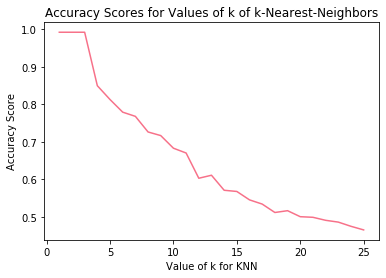

In [61]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()